In [1]:
import os
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import ToTensor, Normalize, Compose
from torchvision.utils import save_image
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

In [2]:
mnist = MNIST(root='data',train=True,download=True,transform=Compose([ToTensor(),Normalize(mean=(0.5,), std=(0.5,))]))

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
image,label = mnist[0]

In [4]:
image.shape

torch.Size([1, 28, 28])

In [5]:
import matplotlib.pyplot as plt

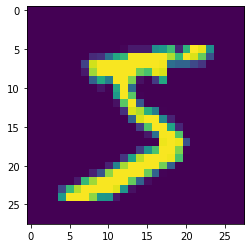

In [6]:
plt.imshow(image[0])

In [7]:
image[:,:10,:10]

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -0.7647, -0.7176],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -0.6157,  0.8667,  0.9843],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -0.8588,  0.7176,  0.9843],
 

In [54]:
batch_size = 100
data_loader = DataLoader(mnist,batch_size,shuffle=True)

In [55]:
for image,label in data_loader:
    print(image.shape)
    print(label)
    break

torch.Size([100, 1, 28, 28])
tensor([8, 0, 2, 9, 5, 2, 8, 3, 8, 6, 3, 6, 8, 8, 6, 3, 1, 7, 7, 0, 6, 2, 5, 3,
        9, 3, 5, 4, 5, 7, 5, 7, 0, 0, 4, 4, 7, 8, 5, 0, 6, 5, 5, 2, 1, 8, 4, 6,
        5, 0, 0, 3, 7, 4, 2, 7, 1, 3, 9, 1, 1, 4, 3, 5, 8, 6, 5, 4, 2, 3, 3, 8,
        2, 1, 6, 4, 7, 4, 1, 8, 2, 9, 9, 4, 6, 9, 9, 5, 0, 3, 1, 5, 0, 5, 3, 7,
        9, 8, 1, 7])


In [56]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [57]:
device

device(type='cuda')

In [58]:
image_size = 784
hidden_size = 256

In [59]:
#discriminator here is essentially a binary classifier
D = nn.Sequential(
    nn.Linear(image_size,hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size,hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size,1),
    nn.Sigmoid()
)

In [60]:
D.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): LeakyReLU(negative_slope=0.2)
  (4): Linear(in_features=256, out_features=1, bias=True)
  (5): Sigmoid()
)

In [61]:
#generator
latent_size = 64
G = nn.Sequential(
    nn.Linear(latent_size,hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size,hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size,image_size),
    nn.Tanh() #to have output values in the range of -1 and 1, which we have normalised the dataset to earlier
)

In [62]:
y = G(torch.randn(2,latent_size))

In [63]:
y.shape

torch.Size([2, 784])

In [64]:
gen_images = y.reshape((-1,28,28)).detach()

In [65]:
gen_images.shape

torch.Size([2, 28, 28])

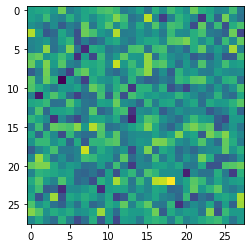

In [66]:
plt.imshow(gen_images[0])

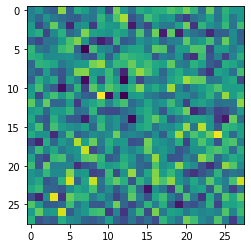

In [67]:
plt.imshow(gen_images[1])

In [68]:
G.to(device)

Sequential(
  (0): Linear(in_features=64, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=784, bias=True)
  (5): Tanh()
)

In [69]:
gen_images = gen_images.reshape(2,-1).to(device)

In [70]:
D(gen_images)

tensor([[0.4920],
        [0.4914]], device='cuda:0', grad_fn=<SigmoidBackward>)

In [71]:
#train discriminator
loss_func = nn.BCELoss()
d_optim = torch.optim.Adam(D.parameters(),lr=0.0002)

In [72]:
def reset_grad():
    d_optim.zero_grad()
    g_optim.zero_grad()

In [73]:
def train_disc(images):
    real_labels = torch.ones(batch_size,1).to(device) #real image is positive or 1
    fake_labels = torch.zeros(batch_size,1).to(device) #fake image is negative or 0

    outputs = D(images) #for real images, label should be 1
    d_loss_real = loss_func(outputs,real_labels)
    real_score = outputs #b/w 0 and 1, should be close to 1

    z = torch.randn(batch_size,latent_size).to(device)
    fake_images = G(z)
    outputs = D(fake_images)
    d_loss_fake = loss_func(outputs,fake_labels)
    fake_score = outputs #b/w 0 and 1, should be close to 0
    #discriminator should be good at classifying images as real or fake OR 0 or 1

    d_loss = d_loss_real + d_loss_fake
    reset_grad()
    d_loss.backward()
    d_optim.step()

    return d_loss, real_score, fake_score

In [74]:
#output of generator is image, so while training we use disc loss as part of loss function
#so first gen image output, pass to disc, with target 1 as we want to fool the disc
g_optim = torch.optim.Adam(G.parameters(),lr=0.0002)

In [75]:
def train_gen():
    z = torch.randn(batch_size,latent_size).to(device)
    fake_images = G(z)
    labels = torch.ones(batch_size,1).to(device)
    g_loss = loss_func(D(fake_images),labels)

    reset_grad()
    g_loss.backward()
    g_optim.step()
    return g_loss, fake_images

In [76]:
import os

sample_dir = 'samples'
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

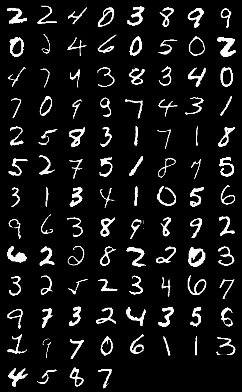

In [77]:
from IPython.display import Image
from torchvision.utils import save_image

# Save some real images
for images, _ in data_loader:
    images = images.reshape(images.size(0), 1, 28, 28)
    save_image(images, os.path.join(sample_dir, 'real_images.png'), nrow=8)
    break
   
Image(os.path.join(sample_dir, 'real_images.png'))

Saving fake_images-0000.png


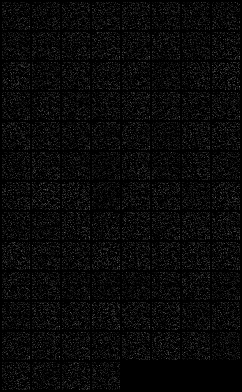

In [78]:
sample_vectors = torch.randn(batch_size, latent_size).to(device)

def save_fake_images(index):
    fake_images = G(sample_vectors)
    fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
    fake_fname = 'fake_images-{0:0=4d}.png'.format(index)
    print('Saving', fake_fname)
    save_image(fake_images, os.path.join(sample_dir, fake_fname), nrow=8)
    
# Before training
save_fake_images(0)
Image(os.path.join(sample_dir, 'fake_images-0000.png'))

In [80]:
num_epochs = 300
total_step = len(data_loader)
d_losses, g_losses, real_scores, fake_scores = [],[],[],[]

for epoch in range(num_epochs):
    for i,(images,_) in enumerate(data_loader):
        images = images.reshape(batch_size,-1).to(device)
        d_loss, real_score, fake_score = train_disc(images)
        g_loss, fake_images = train_gen()

        if (i+1)%200 == 0:
            d_losses.append(d_loss.item())
            g_losses.append(g_loss.item())
            real_scores.append(real_score.mean().item())
            fake_scores.append(fake_score.mean().item())
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                  .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(), 
                          real_score.mean().item(), fake_score.mean().item()))
    save_fake_images(epoch+1)

Epoch [0/300], Step [200/600], d_loss: 0.3431, g_loss: 2.8356, D(x): 0.89, D(G(z)): 0.16
Epoch [0/300], Step [400/600], d_loss: 0.0755, g_loss: 5.2620, D(x): 0.97, D(G(z)): 0.03
Epoch [0/300], Step [600/600], d_loss: 0.1744, g_loss: 3.4943, D(x): 0.92, D(G(z)): 0.06
Saving fake_images-0001.png
Epoch [1/300], Step [200/600], d_loss: 1.0371, g_loss: 2.6772, D(x): 0.65, D(G(z)): 0.23
Epoch [1/300], Step [400/600], d_loss: 0.5381, g_loss: 2.8245, D(x): 0.87, D(G(z)): 0.25
Epoch [1/300], Step [600/600], d_loss: 2.6197, g_loss: 1.2197, D(x): 0.44, D(G(z)): 0.45
Saving fake_images-0002.png
Epoch [2/300], Step [200/600], d_loss: 0.4724, g_loss: 2.8446, D(x): 0.84, D(G(z)): 0.16
Epoch [2/300], Step [400/600], d_loss: 0.9512, g_loss: 1.9044, D(x): 0.68, D(G(z)): 0.22
Epoch [2/300], Step [600/600], d_loss: 0.6333, g_loss: 2.1079, D(x): 0.81, D(G(z)): 0.27
Saving fake_images-0003.png
Epoch [3/300], Step [200/600], d_loss: 1.3204, g_loss: 1.6859, D(x): 0.59, D(G(z)): 0.32
Epoch [3/300], Step [400/6

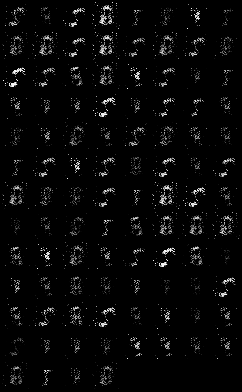

In [81]:
Image('./samples/fake_images-0010.png')

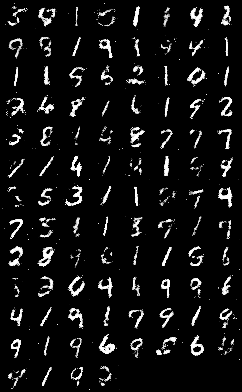

In [82]:
Image('./samples/fake_images-0100.png')

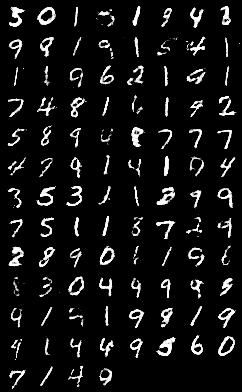

In [83]:
Image('./samples/fake_images-0300.png')